In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [10]:
# load data
new_esp = pd.read_csv("ESP_SNP_data.tsv", sep = "\t")

In [11]:
new_esp.head()

,LOC,GENE,EFF,AF
0,1:69428:T:G,OR4F5,NON_SYNONYMOUS_CODING,0.030647
1,1:69496:G:A,OR4F5,NON_SYNONYMOUS_CODING,0.002364
2,1:69511:A:G,OR4F5,NON_SYNONYMOUS_CODING,0.759766
3,1:69590:T:A,OR4F5,NON_SYNONYMOUS_CODING,0.000102
4,1:69594:T:C,OR4F5,SYNONYMOUS_CODING,0.000205


## Data observation

In [15]:
# data observation: genes

genes = set(new_esp['GENE'])
len(genes)

18571

In [17]:
#data observation: EFF

EFF = list(set(new_esp['EFF']))
EFF

['SYNONYMOUS_CODING', 'NON_SYNONYMOUS_CODING', 'STOP_GAINED']

## Filtering data

In [26]:
df_synom = new_esp.loc[new_esp['EFF'] == 'SYNONYMOUS_CODING']
genes_synom = set(df_synom["GENE"])
removed_genes = list(genes - genes_synom)
removed_genes

['SMR3B',
 'NPIPA1',
 'FRG2',
 'DEFB133',
 'CDC26',
 'LOC101929372',
 'ZCCHC10',
 'SMIM6',
 'KRTAP22-2',
 'BAGE4',
 'BORCS8-MEF2B',
 'H2BFM',
 'RPS10',
 'C7orf66',
 'C2orf72',
 'MRGPRG',
 'SPDYE6',
 'CD52',
 'PET117',
 'C14orf178',
 'TMEM31',
 'RNF103-CHMP3',
 'ZC2HC1B',
 'SRY',
 'FXYD6',
 'LGALS7',
 'PRH1',
 'FAM133A',
 'ATOX1',
 'GOLGA6C',
 'AMELY',
 'OR2T29',
 'LYRM2',
 'POLR2J3',
 'SPINK8',
 'TRNP1',
 'TMEM56-RWDD3',
 'GOLGA6D',
 'CCDC152',
 'RPL39L',
 'RNF222',
 'SNRPE',
 'C12orf75',
 'LYPD8',
 'SPATA31D4',
 'DSTN',
 'GNG7',
 'C9orf16',
 'IGIP',
 'POLR2J',
 'PRAC1',
 'EIF1AY',
 'RPL36A-HNRNPH2',
 'HDDC3',
 'C14orf2',
 'NATD1',
 'SMIM3',
 'NBPF4',
 'TBC1D7',
 'CGB5',
 'SMIM9',
 'PTN',
 'LAMTOR3',
 'C17orf107',
 'PECAM1',
 'NUPR2',
 'ARHGAP8',
 'TBC1D3C',
 'C2orf74',
 'SCHIP1',
 'MT2A',
 'SPX',
 'MAFF',
 'MORN2',
 'WFDC6',
 'IQCF6',
 'CISD1',
 'NBPF11',
 'RPP21',
 'RFPL4A',
 'H2AFB2',
 'C7orf69',
 'C12orf73',
 'SMIM12',
 'GNG10',
 'SMN1',
 'PMF1-BGLAP',
 'FAM89B',
 'H2AFV',
 'SMIM4'

In [27]:
final_esp = new_esp[~new_esp['GENE'].isin(removed_genes)]
len(set(final_esp["GENE"]))

18405

## Implementation of script

In [ ]:
gene = 'OR4F5' start gene
for i in len(final_esp["GENE"]):
    if final_esp["GENE"][i] == gene:
        

In [31]:
data_grp = final_esp.groupby(['EFF', 'GENE'])

In [32]:
data_grp.head()

,LOC,GENE,EFF,AF
0,1:69428:T:G,OR4F5,NON_SYNONYMOUS_CODING,0.030647
1,1:69496:G:A,OR4F5,NON_SYNONYMOUS_CODING,0.002364
2,1:69511:A:G,OR4F5,NON_SYNONYMOUS_CODING,0.759766
3,1:69590:T:A,OR4F5,NON_SYNONYMOUS_CODING,0.000102
4,1:69594:T:C,OR4F5,SYNONYMOUS_CODING,0.000205
...,...,...,...,...
1029749,Y:22923212:T:A,RPS4Y2,NON_SYNONYMOUS_CODING,0.000409
1029750,Y:22923215:A:G,RPS4Y2,NON_SYNONYMOUS_CODING,0.000409
1029751,Y:22930693:C:T,RPS4Y2,SYNONYMOUS_CODING,0.000409
1029752,Y:22942886:A:G,RPS4Y2,NON_SYNONYMOUS_CODING,0.000409


In [60]:
NS_list = []
genes_of_interest = list(set(final_esp["GENE"]))
genes_NS = []
for i in genes_of_interest:
    temp_df = final_esp.loc[new_esp['GENE'] == i]
    temp_df.head()
    
    #calculation of AF sum for different types of EFF
    af_syn = temp_df.loc[temp_df['EFF'] == 'SYNONYMOUS_CODING', 'AF'].sum()
    af_nonsyn = temp_df.loc[temp_df['EFF'] == 'NON_SYNONYMOUS_CODING', 'AF'].sum()
    af_frameshift = temp_df.loc[temp_df['EFF'] == 'STOP_GAINED', 'AF'].sum()
    
    # calculation of metric
    statistics = (af_nonsyn + af_frameshift)/af_syn 
    NS_list.append(statistics)
    genes_NS.append(i)

In [61]:
genes_NS_dict = {'GENE':genes_NS,'NS_metric':NS_list}
genes_NS_df = pd.DataFrame(genes_NS_dict)
genes_NS_df.head()

,GENE,NS_metric
0,GLMN,12.406720
1,GABPA,0.062046
2,RNF167,1.909089
3,SPRR1A,18.759419
4,ATP6V1E1,0.003916


## Distribution and Mean

In [69]:
joj = list(genes_NS_df['NS_metric'])

In [81]:
bins_value = np.arange(start=min(joj), stop=max(joj), step=100)

<AxesSubplot:ylabel='Frequency'>

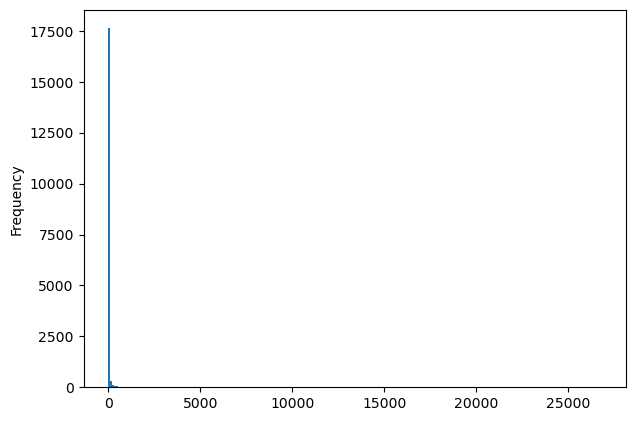

In [82]:
pd.Series(joj).plot(kind='hist', bins = bins_value)

In [88]:
# mean of the values
np.average(joj)

35.260736076505935

## Top-100 genes

In [101]:
# top - 100 highest genes
highest = genes_NS_df.sort_values(by='NS_metric', ascending=False)
highest.head()

,GENE,NS_metric
7665,DEFB108B,26863.065988
14145,C4orf36,15141.996735
9900,KRTAP4-2,12706.389038
15073,KRTAP22-1,12060.000411
4285,HEPN1,10366.154756


In [104]:
highest_list = list(highest['GENE'])[:100]
highest_list

['DEFB108B',
 'C4orf36',
 'KRTAP4-2',
 'KRTAP22-1',
 'HEPN1',
 'SPINK6',
 'CLPSL2',
 'WFDC10B',
 'UQCC3',
 'CXCL11',
 'LCE5A',
 'ST20',
 'OR2T5',
 'SAA4',
 'OR52N4',
 'FMC1',
 'CCL15',
 'LYRM4',
 'SPAG11A',
 'MAGEB16',
 'C17orf58',
 'FAM180B',
 'OR4F5',
 'GAGE12J',
 'VMO1',
 'PSORS1C2',
 'PSMG4',
 'C2orf70',
 'C2orf88',
 'NPW',
 'SAA2',
 'PLA2G2C',
 'CLEC1B',
 'HINT3',
 'KLRC1',
 'S100A7',
 'C2orf83',
 'C8orf31',
 'KLRD1',
 'MRPL18',
 'MT1A',
 'BCL2L10',
 'BTLA',
 'TM4SF19',
 'SLC25A45',
 'C8orf4',
 'KRTAP12-3',
 'MLN',
 'LOC401052',
 'TSEN15',
 'ARTN',
 'C4orf32',
 'KLF2',
 'OBP2A',
 'TNFSF12-TNFSF13',
 'OR6C1',
 'C12orf77',
 'CYBRD1',
 'C10orf25',
 'SPATA45',
 'OR11H1',
 'CDPF1',
 'GSTT2',
 'ARMS2',
 'KRTAP25-1',
 'C1orf105',
 'CENPBD1',
 'KRTAP4-4',
 'OR5B17',
 'COQ4',
 'CFAP36',
 'CSAG1',
 'C1orf162',
 'IL36A',
 'DEFB128',
 'PRR4',
 'PRSS48',
 'SMCO3',
 'PRDX5',
 'UBXN8',
 'PSMD9',
 'EDA2R',
 'ATPIF1',
 'FAM127B',
 'CRACR2B',
 'FAM122C',
 'TSHB',
 'SSMEM1',
 'SUMO4',
 'SPINK4',
 'G

In [99]:
# top - 100 lowest genes
lowest = genes_NS_df.sort_values(by='NS_metric', ascending=True)
lowest.head()

,GENE,NS_metric
9202,ZHX1-C8orf76,0.0
9919,PTPN20,0.0
855,UBB,0.0
7373,NEDD8-MDP1,0.0
8166,GAS1,0.0


In [105]:
lowest_list = list(lowest['GENE'])[:100]
lowest_list

['ZHX1-C8orf76',
 'PTPN20',
 'UBB',
 'NEDD8-MDP1',
 'GAS1',
 'RPL38',
 'TUBB',
 'GPR75-ASB3',
 'UBE2L3',
 'C17orf51',
 'MTCP1',
 'GNG3',
 'UBE2D2',
 'UBE2K',
 'OLIG1',
 'SDHAF1',
 'DYNLL1',
 'VPS29',
 'DPY30',
 'RPS23',
 'PABPC1L2A',
 'CSNK1A1',
 'SEC61G',
 'ANKRD34C',
 'SNRPG',
 'UBE2H',
 'RPL27A',
 'SNRPD3',
 'RPL30',
 'RPS4X',
 'SRSF3',
 'FAM127A',
 'TMEM35B',
 'PABPN1',
 'ANXA8',
 'FAM157B',
 'ARF6',
 'TGIF2-C20orf24',
 'SNRPD1',
 'ARF4',
 'NRGN',
 'HBA1',
 'TRIQK',
 'HRK',
 'TXNL4A',
 'PPIA',
 'SMIM13',
 'RPL39',
 'EIF1AX',
 'RPS15A',
 'NCBP2',
 'TNNI3K',
 'UBE2QL1',
 'TUBB2B',
 'PHF5A',
 'CRH',
 'ZNF706',
 'FGF16',
 'H2AFZ',
 'OST4',
 'RPS28',
 'SUMO2',
 'C19orf24',
 'BEAN1',
 'TMED7',
 'PPP4C',
 'H3F3B',
 'FAM157A',
 'TMSB10',
 'POTEB2',
 'TOMM6',
 'CCDC71L',
 'ARPC4',
 'SP9',
 'H3F3A',
 'NUDT21',
 'SRGAP2C',
 'ERH',
 'MOB4',
 'RAB2A',
 'TUBA1A',
 'TMEM158',
 'RNF187',
 'PRPS1',
 'EIF1',
 'UBE2I',
 'KLF16',
 'TMEM212',
 'SSU72',
 'UBE2A',
 'CFL1',
 'PSMA7',
 'FAM228B',
 'POU3F2'

### Conclusion

The lowest top-100 genes are more conserved in the evolution and non-synonymous mutations accumulate slower than synonymous, which indicates the negative selection.

The highest top-100 genes are less conserved in the evolution and non-synonymous mutations, which lead to the functional change, accumulate faster than synonymous, which indicates the positive selection.


## MSigDB

**Lowest top-100 genes** are involved in the key pathways of the organism: nervous system development, metabolism of RNA, cellular response to stimuli, infectious disease and etc. This indicates that low variation in genes, which play important role in the methabolism and development pathways, are under negative selection, because variation in these genes may lead to the functional change of the protein and by that disrupt the pathway functionality.

![alt text](lowest.png)

Some of the **highest top 100 genes** play a role in the process of keratinization, where variation can lead to a positive effect on the organism, and thus these genes are under positive selection.

![alt text](highest.png)